In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Objectives

* Exploratory Data Analysis
* How to deal with data that has anonymous features

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
train.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.366667,0.611765,0.05,0,0.110435,0.803973,0.106075,0.473965,0.835617,0.106452,...,1,1,1,1,0,1,0,0,1,0
1,0.100000,0.758175,0.30,0,0.180128,0.621378,0.287144,0.503919,0.674919,0.403616,...,0,0,0,0,0,0,0,0,0,0
2,0.100000,0.658812,0.10,0,0.243421,0.640959,0.312765,0.279784,0.686775,0.280301,...,0,0,0,0,0,0,0,0,0,0
3,0.100000,0.655752,0.10,0,0.226978,0.776996,0.150657,0.336948,0.802121,0.125608,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.484851,0.00,0,0.561200,0.771463,0.244287,0.293096,0.717575,0.230842,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.columns

Index([u'Activity', u'D1', u'D2', u'D3', u'D4', u'D5', u'D6', u'D7', u'D8',
       u'D9',
       ...
       u'D1767', u'D1768', u'D1769', u'D1770', u'D1771', u'D1772', u'D1773',
       u'D1774', u'D1775', u'D1776'],
      dtype='object', length=1777)

In [6]:
train.Activity.value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

** Balanced Dataset **

In [7]:
assert train.isnull().sum().sum() == 0, 'There are some missing values in the dataset'

In [8]:
assert test.isnull().sum().sum() == 0, 'There are some missing values in the dataset'

## Correlation

In [13]:
def get_pearson_score(target, feature_name):
    return np.corrcoef(train[target], train[feature_name])[0][1]

def get_correlation_scores(df):
    if 'Activity' not in df.columns:
        raise ValueError('Target Variable is missing in the dataset')
    
    correlation_map = {}
    
    for feat in df.columns:
        correlation_map[('Activity', feat)] = get_pearson_score('Activity', feat)
    
    return correlation_map

In [14]:
correlation_map = get_correlation_scores(train)

In [24]:
def get_highly_correlated_features(correlation_map, threshold=0.3):
    highly_correlated_features = []
    
    for key, value in correlation_map.iteritems():
        if abs(value) >= threshold:
            if key[0] != key[1]: # Avoid pairs like ( 'Activity', 'Activity' )
                highly_correlated_features.append(key)
    
    return highly_correlated_features

In [25]:
highly_correlated_features = get_highly_correlated_features(correlation_map)

In [32]:
def analyze_different_thresholds( correlation_map ):
    thresholds = np.linspace(0.2, 0.4, 10)
    
    for threshold in thresholds:
        print 'Threshold %f -> \nFeature Pairs %s \n' %(threshold, get_highly_correlated_features(correlation_map, threshold)) 

In [33]:
analyze_different_thresholds( correlation_map )

Threshold 0.200000 -> 
Feature Pairs [('Activity', 'D146'), ('Activity', 'D659'), ('Activity', 'D607'), ('Activity', 'D209'), ('Activity', 'D596'), ('Activity', 'D87'), ('Activity', 'D27'), ('Activity', 'D217'), ('Activity', 'D469'), ('Activity', 'D660'), ('Activity', 'D182'), ('Activity', 'D747')] 

Threshold 0.222222 -> 
Feature Pairs [('Activity', 'D659'), ('Activity', 'D87'), ('Activity', 'D27'), ('Activity', 'D217'), ('Activity', 'D469'), ('Activity', 'D182'), ('Activity', 'D747')] 

Threshold 0.244444 -> 
Feature Pairs [('Activity', 'D27'), ('Activity', 'D469')] 

Threshold 0.266667 -> 
Feature Pairs [('Activity', 'D27'), ('Activity', 'D469')] 

Threshold 0.288889 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.311111 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.333333 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.355556 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.377778 -> 
Feature Pairs [('Activity', 'D27')] 

Threshold 0.400000 -> 
Feature Pair

## Visualize Mean by Category

In [34]:
train_neg_target = train[train.Activity == 0]
train_pos_target = train[train.Activity == 1]

In [37]:
features = train.columns[1:] # Omitting Activity variable
train_neg_target_mean = train_neg_target[features].mean()
train_pos_target_mean = train_pos_target[features].mean()

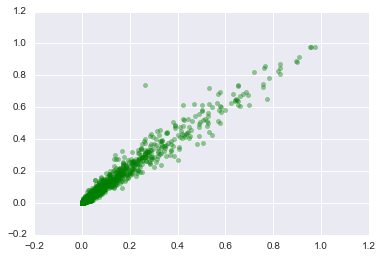

In [38]:
plt.scatter(train_neg_target_mean, train_pos_target_mean, color='g', alpha=0.4);

In [40]:
mask = (train_neg_target_mean > 0.2) & ( train_neg_target_mean < 0.3)
df1 = train_neg_target_mean[mask]

mask = ( train_pos_target_mean > 0.7) & ( train_pos_target_mean < 0.8)
df2 = train_pos_target_mean[mask]

print 'Common column ', set(df1.col)

D5       0.228685
D7       0.261290
D10      0.251676
D16      0.265259
D27      0.263832
D30      0.293579
D47      0.214984
D103     0.284289
D106     0.236429
D198     0.200367
D199     0.269549
D219     0.207658
D955     0.264997
D963     0.288294
D966     0.246360
D976     0.276063
D978     0.298195
D983     0.240536
D985     0.202097
D987     0.225976
D988     0.233547
D991     0.229470
D997     0.270821
D999     0.237041
D1002    0.262085
D1006    0.228888
D1007    0.244030
D1008    0.253349
D1009    0.267909
D1011    0.284799
           ...   
D1142    0.234129
D1147    0.220734
D1150    0.245195
D1151    0.235294
D1152    0.246942
D1161    0.263250
D1163    0.246360
D1164    0.265579
D1165    0.242283
D1166    0.252184
D1167    0.276645
D1168    0.252766
D1172    0.262667
D1175    0.287129
D1178    0.214327
D1182    0.291788
D1187    0.262085
D1189    0.240536
D1191    0.262667
D1194    0.242865
D1197    0.264997
D1199    0.218987
D1202    0.225976
D1232    0.211998
D1241    0